# 1. Net

### Train loss curve
![Figure_1 net.png](<attachment:Figure_1 net.png>)
### Confusion Matrix
|        | Plane | Car  | Bird  | Cat  | Deer  | Dog  | Frog  | Horse | Ship  | Truck |
|--------|-------|------|-------|------|-------|------|-------|-------|-------|-------|
| **Plane** | 72.60 | 3.00  | 6.00  | 1.40 | 1.30  | 0.20 | 2.10  | 0.40  | 6.40  | 6.60  |
| **Car**   | 5.20  | 73.30 | 1.40  | 0.80 | 0.20  | 0.00 | 1.00  | 0.20  | 3.00  | 14.90 |
| **Bird**  | 9.80  | 1.40  | 47.30 | 11.30| 8.50  | 2.00 | 11.20 | 2.70  | 2.40  | 3.40  |
| **Cat**   | 4.40  | 1.70  | 10.10 | 48.40| 5.40  | 2.20 | 15.10 | 2.80  | 2.70  | 7.20  |
| **Deer**  | 7.50  | 1.30  | 14.60 | 9.80 | 39.30 | 1.00 | 14.40 | 9.20  | 0.80  | 2.10  |
| **Dog**   | 3.20  | 0.90  | 13.00 | 47.50| 5.60  | 12.90| 6.80  | 4.60  | 2.30  | 3.20  |
| **Frog**  | 1.20  | 1.90  | 5.80  | 8.40 | 3.80  | 0.10 | 72.70 | 0.70  | 0.90  | 4.50  |
| **Horse** | 5.80  | 0.60  | 4.80  | 12.90| 6.30  | 2.60 | 2.20  | 55.60 | 1.30  | 7.90  |
| **Ship**  | 20.60 | 6.10  | 2.20  | 2.20 | 0.30  | 0.00 | 0.60  | 0.50  | 60.10 | 7.40  |
| **Truck** | 4.70  | 16.80 | 1.00  | 2.30 | 0.40  | 0.10 | 1.70  | 1.00  | 3.50  | 68.50 |

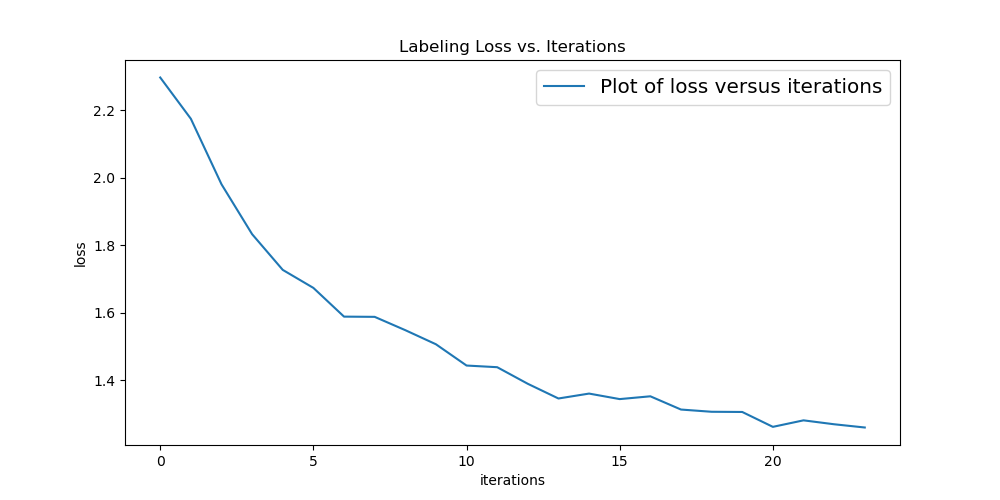

# 2. Net2

### Train loss curve
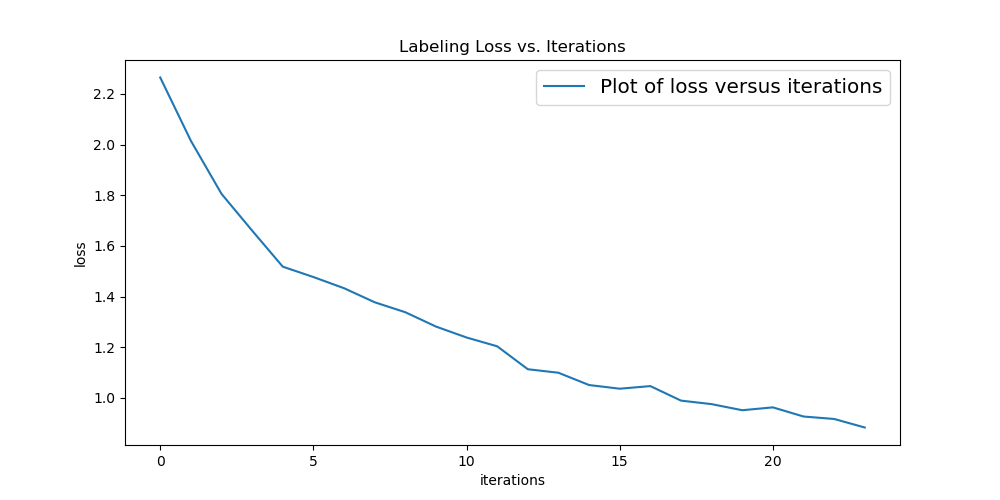

### Confusion Matrix
|        | Plane | Car  | Bird  | Cat  | Deer  | Dog  | Frog  | Horse | Ship  | Truck |
|--------|-------|------|-------|------|-------|------|-------|-------|-------|-------|
| **Plane** | 72.40 | 2.10  | 5.60  | 1.70 | 2.40  | 0.20 | 1.20  | 1.50  | 6.60  | 6.30  |
| **Car**   | 0.90  | 78.10 | 0.80  | 0.40 | 0.40  | 0.30 | 0.60  | 0.10  | 1.50  | 16.90 |
| **Bird**  | 6.10  | 0.70  | 53.10 | 4.70 | 12.40 | 6.10 | 8.40  | 3.70  | 2.10  | 2.70  |
| **Cat**   | 1.70  | 0.80  | 6.00  | 46.60| 8.30  | 15.80| 8.60  | 4.90  | 2.80  | 4.50  |
| **Deer**  | 1.50  | 0.20  | 5.60  | 3.60 | 67.40 | 2.80 | 8.60  | 7.80  | 2.00  | 0.50  |
| **Dog**   | 1.10  | 0.50  | 5.40  | 16.20| 6.20  | 58.30| 2.50  | 5.60  | 1.80  | 2.40  |
| **Frog**  | 0.30  | 0.90  | 3.80  | 4.90 | 2.60  | 1.30 | 82.10 | 0.70  | 0.80  | 2.60  |
| **Horse** | 0.90  | 0.40  | 2.00  | 3.50 | 6.10  | 6.20 | 0.70  | 77.20 | 0.60  | 2.40  |
| **Ship**  | 5.40  | 4.10  | 0.90  | 0.60 | 0.80  | 0.50 | 0.40  | 0.60  | 83.00 | 3.70  |
| **Truck** | 1.90  | 5.30  | 0.30  | 0.70 | 0.30  | 0.30 | 0.30  | 1.60  | 3.30  | 86.00 |


# 3. Net3

In [2]:
import os
import sys
current_dir = os.getcwd()
print("current_dir : %s" % current_dir)
goal = os.path.join(os.path.dirname(current_dir), "HW4/DLStudio-2.5.1")
sys.path.append(goal)
print("Navigated to:", goal)
from DLStudio import *

current_dir : /Users/ac/Documents/Purdue_Master/Year 1 - Semester 2/ECE60146/HW5
Navigated to: /Users/ac/Documents/Purdue_Master/Year 1 - Semester 2/ECE60146/HW4/DLStudio-2.5.1


In [3]:
# This code is mainly borrowed from HW5.pdf
import random
import numpy as np
import torch
import os

# Set random seed for reproducibility
seed = 0
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmarks = False
os.environ['PYTHONHASHSEED'] = str(seed)

import torch.nn as nn
import torch.nn.functional as F

# Initialize DLStudio

dls = DLStudio(
    dataroot="./data/CIFAR-10/",
    image_size=[32, 32],
    path_saved_model="./saved_model",
    momentum=0.9,
    learning_rate=1e-3,
    epochs=2,
    batch_size=4,
    classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'),
    use_gpu=True # Set to False by default
)

# Define Custom Experiments With CIFAR class
class CustomExperimentsWithCIFAR(DLStudio.ExperimentsWithCIFAR):
    # Define a new model Net3
    class Net3(nn.Module):
        def __init__(self):
            super(CustomExperimentsWithCIFAR.Net3, self).__init__()
            self.model = nn.Sequential(
                # First convolutional layer
                nn.Conv2d(3, 32, 3, padding=1), # Formula: ((W - K + 2P)/S) + 1. ((64 - 3 + 2)/1) + 1 = 64. Output: (32, 64, 64)
                nn.BatchNorm2d(32), 
                nn.ReLU(),

                # Second convolutional layer
                nn.Conv2d(32, 32, 3, padding=1), # Output: (32, 64, 64)
                nn.BatchNorm2d(32),
                nn.ReLU(),

                # Third convolutional layer
                nn.Conv2d(32, 32, 3, padding=1), # (64  -3 + 1)/1 + 1 = 32. Output: (32, 64, 64)
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.MaxPool2d(2, 2), # Output: (32, 32, 32) 

                # Fourth convolutional layer
                nn.Conv2d(32, 64, 3, padding=1), # Output: (64, 32, 32)
                nn.BatchNorm2d(64),
                nn.ReLU(),

                # Fifth convolutional layer
                nn.Conv2d(64, 64, 3, padding=1), # Output: (64, 32, 32)
                nn.BatchNorm2d(64),
                nn.ReLU(),

                # Sixth convolutional layer
                nn.Conv2d(64, 64, 3, padding=1), # Output: (64, 32, 32)
                nn.BatchNorm2d(64),
                nn.ReLU(), 
                nn.MaxPool2d(2, 2), # Output: (64, 16, 16)

                # Seventh convolutional layer
                nn.Conv2d(64, 128, 3, padding=1), # Output: (128, 16, 16)
                nn.BatchNorm2d(128),
                nn.ReLU(),

                # Eigth convolutional layer
                nn.Conv2d(128, 128, 3, padding=1), # Output: (128, 16, 16)
                nn.BatchNorm2d(128),
                nn.ReLU(),


                # Fully connected layers
                nn.Flatten(), # Output: (128*16*16 = 32768)
                nn.Linear(32768, 512), # Output: (512, )
                nn.BatchNorm1d(512),
                nn.ReLU(),
                nn.Dropout(0.05),

                nn.Linear(512, 128), # Output: (128, )
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Dropout(0.05),

                nn.Linear(128, 10) # Output: 10 classes
            )
        def forward(self, x):
            return self.model(x)

  

# Use the new class
exp_cifar = CustomExperimentsWithCIFAR(dl_studio=dls)
exp_cifar.load_cifar_10_dataset()

# Instantiate the new model
# model = exp_cifar.Net()
# model = exp_cifar.Net2()
model = exp_cifar.Net3()

# Display network properties
number_of_learnable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\n\nThe number of learnable parameters in the model: %d" % number_of_learnable_params)

# Run training and testing
exp_cifar.run_code_for_training(model, display_images=False)
exp_cifar.run_code_for_testing(model, display_images=False)


Files already downloaded and verified
Files already downloaded and verified


The number of learnable parameters in the model: 17180234


Starting training loop...



NotImplementedError: Module [Net3] is missing the required "forward" function

### Creating CustomExperimentsCIFAR and Net3
### Train loss curve

### Confusion Matrix

# 4. Overall accuracy of 3 models
|        | Accuracy |
|--------|-------|
| **Net** | 55% |
| **Net2** | 70% |  
| **Net3** | % | 

net1: Overall accuracy of the network on the 10000 test images: 55 %
net2: Overall accuracy of the network on the 10000 test images: 70 %

# 5. Per class accuracy of 3 models
|        | **Net**  | **Net2** | **Net3** |
|--------|---------|---------|---------|
| **Plane** | 72.60  | 72.40  |         |
| **Car**   | 73.30  | 78.10  |         |
| **Bird**  | 47.30  | 53.10  |         |
| **Cat**   | 48.40  | 46.60  |         |
| **Deer**  | 39.30  | 67.40  |         |
| **Dog**   | 12.90  | 58.30  |         |
| **Frog**  | 72.70  | 82.10  |         |
| **Horse** | 55.60  | 77.20  |         |
| **Ship**  | 60.10  | 83.00  |         |
| **Truck** | 68.50  | 86.00  |         |


# 6. Observations